In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import naive_bayes

In [2]:
df=pd.read_csv("Falcon_9.csv")
df

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0               6  2010-06-04       Falcon 9   8191.07911   LEO  CCSFS SLC 40   
1               8  2012-05-22       Falcon 9    525.00000   LEO  CCSFS SLC 40   
2              10  2013-03-01       Falcon 9    677.00000   ISS  CCSFS SLC 40   
3              11  2013-09-29       Falcon 9    500.00000    PO   VAFB SLC 4E   
4              12  2013-12-03       Falcon 9   3170.00000   GTO  CCSFS SLC 40   
..            ...         ...            ...          ...   ...           ...   
163           181  2022-08-28       Falcon 9  13260.00000  VLEO    KSC LC 39A   
164           182  2022-08-31       Falcon 9  13260.00000  VLEO   VAFB SLC 4E   
165           185  2022-09-17       Falcon 9  13260.00000  VLEO  CCSFS SLC 40   
166           186  2022-09-24       Falcon 9  13260.00000  VLEO  CCSFS SLC 40   
167           187  2022-10-05       Falcon 9   8191.07911   ISS    KSC LC 39A   

         Outcome  Flights  GridFins  Reused  Legs                LandingPad  \
0      None None        1         0       0     0                      None   
1      None None        1         0       0     0                      None   
2      None None        1         0       0     0                      None   
3    False Ocean        1         0       0     0                      None   
4      None None        1         0       0     0                      None   
..           ...      ...       ...     ...   ...                       ...   
163    True ASDS        2         1       1     1  5e9e3033383ecb075134e7cd   
164    True ASDS        7         1       1     1  5e9e3032383ecb6bb234e7ca   
165    True ASDS        6         1       1     1  5e9e3033383ecbb9e534e7cc   
166    True ASDS        4         1       1     1  5e9e3033383ecbb9e534e7cc   
167    True ASDS        1         1       0     1  5e9e3033383ecbb9e534e7cc   

     Block  ReusedCount Serial   Longitude   Latitude  Landing  
0      1.0            0  B0003  -80.577366  28.561857        0  
1      1.0            0  B0005  -80.577366  28.561857        0  
2      1.0            0  B0007  -80.577366  28.561857        0  
3      1.0            0  B1003 -120.610829  34.632093        0  
4      1.0            0  B1004  -80.577366  28.561857        0  
..     ...          ...    ...         ...        ...      ...  
163    5.0            1  B1069  -80.603956  28.608058        1  
164    5.0            6  B1063 -120.610829  34.632093        1  
165    5.0            5  B1067  -80.577366  28.561857        1  
166    5.0            0  B1072  -80.577366  28.561857        1  
167    5.0            0  B1077  -80.603956  28.608058        1  

[168 rows x 18 columns]

In [3]:
df = df.drop(labels=['Date','BoosterVersion','Outcome', 'Longitude','Latitude'], axis=1)
df.head()

FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
0             6   8191.07911   LEO  CCSFS SLC 40        1         0       0   
1             8    525.00000   LEO  CCSFS SLC 40        1         0       0   
2            10    677.00000   ISS  CCSFS SLC 40        1         0       0   
3            11    500.00000    PO   VAFB SLC 4E        1         0       0   
4            12   3170.00000   GTO  CCSFS SLC 40        1         0       0   

   Legs LandingPad  Block  ReusedCount Serial  Landing  
0     0       None    1.0            0  B0003        0  
1     0       None    1.0            0  B0005        0  
2     0       None    1.0            0  B0007        0  
3     0       None    1.0            0  B1003        0  
4     0       None    1.0            0  B1004        0

In [4]:
# One-hot coding of  columns
one_hot = pd.get_dummies(df[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']])
# Merge the one-hot encoded result with the original DataFrame
data = pd.concat([df, one_hot], axis=1)
# Delete the original col column
data = data.drop(labels=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], axis=1)
data = data.drop(labels=['Landing'], axis=1)
data.head()

FlightNumber  PayloadMass  Flights  GridFins  Reused  Legs  Block  \
0             6   8191.07911        1         0       0     0    1.0   
1             8    525.00000        1         0       0     0    1.0   
2            10    677.00000        1         0       0     0    1.0   
3            11    500.00000        1         0       0     0    1.0   
4            12   3170.00000        1         0       0     0    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1060  Serial_B1061  \
0            0            0          0  ...             0             0   
1            0            0          0  ...             0             0   
2            0            0          0  ...             0             0   
3            0            0          0  ...             0             0   
4            0            0          0  ...             0             0   

   Serial_B1062  Serial_B1063  Serial_B1067  Serial_B1069  Serial_B1071  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Serial_B1072  Serial_B1073  Serial_B1077  
0             0             0             0  
1             0             0             0  
2             0             0             0  
3             0             0             0  
4             0             0             0  

[5 rows x 92 columns]

In [5]:
data.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs',
       'Block', 'ReusedCount', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO',
       'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO',
       'Orbit_SO', 'Orbit_SSO', 'Orbit_TLI', 'Orbit_VLEO',
       'LaunchSite_CCSFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecb075134e7cd',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'LandingPad_None',
       'Serial_B0003', 'Serial_B0005', 'Serial_B0007', 'Serial_B1003',
       'Serial_B1004', 'Serial_B1005', 'Serial_B1006', 'Serial_B1007',
       'Serial_B1008', 'Serial_B1010', 'Serial_B1011', 'Serial_B1012',
       'Serial_B1013', 'Serial_B1015', 'Serial_B1016', 'Serial_B1017',
       'Serial_B1018', 'Serial_B1019', 'Serial_B1020', 

In [6]:
data

FlightNumber  PayloadMass  Flights  GridFins  Reused  Legs  Block  \
0               6   8191.07911        1         0       0     0    1.0   
1               8    525.00000        1         0       0     0    1.0   
2              10    677.00000        1         0       0     0    1.0   
3              11    500.00000        1         0       0     0    1.0   
4              12   3170.00000        1         0       0     0    1.0   
..            ...          ...      ...       ...     ...   ...    ...   
163           181  13260.00000        2         1       1     1    5.0   
164           182  13260.00000        7         1       1     1    5.0   
165           185  13260.00000        6         1       1     1    5.0   
166           186  13260.00000        4         1       1     1    5.0   
167           187   8191.07911        1         1       0     1    5.0   

     ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1060  Serial_B1061  \
0              0            0          0  ...             0             0   
1              0            0          0  ...             0             0   
2              0            0          0  ...             0             0   
3              0            0          0  ...             0             0   
4              0            0          0  ...             0             0   
..           ...          ...        ...  ...           ...           ...   
163            1            0          0  ...             0             0   
164            6            0          0  ...             0             0   
165            5            0          0  ...             0             0   
166            0            0          0  ...             0             0   
167            0            0          0  ...             0             0   

     Serial_B1062  Serial_B1063  Serial_B1067  Serial_B1069  Serial_B1071  \
0               0             0             0             0             0   
1               0             0             0             0             0   
2               0             0             0             0             0   
3               0             0             0             0             0   
4               0             0             0             0             0   
..            ...           ...           ...           ...           ...   
163             0             0             0             1             0   
164             0             1             0             0             0   
165             0             0             1             0             0   
166             0             0             0             0             0   
167             0             0             0             0             0   

     Serial_B1072  Serial_B1073  Serial_B1077  
0               0             0             0  
1               0             0             0  
2               0             0             0  
3               0             0             0  
4               0             0             0  
..            ...           ...           ...  
163             0             0             0  
164             0             0             0  
165             0             0             0  
166             1             0             0  
167             0             0             1  

[168 rows x 92 columns]

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [8]:
# Normalization - using two different normalization methods.
def normalization(data, n):
    if n == 1:  # min-max.
        minmax_scaler = MinMaxScaler()
        output = minmax_scaler.fit_transform(data)
        return output
    if n == 2:  # standard deviation.
        std_scaler = StandardScaler()
        output = std_scaler.fit_transform(data)
        return output

In [9]:
# X = normalization(data, 1)
X = normalization(data, 2)
Y = np.array(df['Landing'])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Separate data X and Y into training and test data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Decsion Tree

In [12]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [13]:
tree = DecisionTreeClassifier()

param_grid  = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2,4,6,8,10],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
     'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
     'random_state': [30]}


In [14]:
tree_cv = GridSearchCV(tree, param_grid, cv=10)
tree_cv.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [30], 'splitter': ['best', 'random']})

In [15]:
tree_cv_f1 = GridSearchCV(tree, param_grid, scoring='f1', cv=10)
tree_cv_f1.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [30], 'splitter': ['best', 'random']},
             scoring='f1')

In [16]:
tree_cv_f1.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'random_state': 30,
 'splitter': 'best'}

In [17]:
tree_cv_f1.best_score_

0.9646997929606625

In [18]:
tree_cv_f1.score(X_test, Y_test)

0.9433962264150944

In [19]:
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'random_state': 30,
 'splitter': 'best'}

In [20]:
tree_cv.best_score_

0.9401098901098901

In [21]:
tree_cv.score(X_test, Y_test)

0.9117647058823529

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
import itertools

In [24]:
def plot_confusion_matrix(cm, normalize, y_true, y_predict):
    # cm: The value of the calculated confusion matrix
    plt.imshow(cm, cmap='Blues')
    plt.colorbar()
    # normalize : True:show percentage, False:show number
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

        np.set_printoptions(formatter={"float": "{: 0.2f}".format})
        
    tick_marks = np.arange(len(['Failed Landing', 'Successful Landing']))
    plt.xticks(tick_marks, ['Failed Landing', 'Successful Landing'])
    plt.yticks(tick_marks, ['Failed Landing', 'Successful Landing'])

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.title('Confusion Matrix')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

In [25]:
#y_predict = dtree_cv.predict(X_test)
y_predict = tree_cv.predict(X_test)
cm = confusion_matrix(Y_test, y_predict)

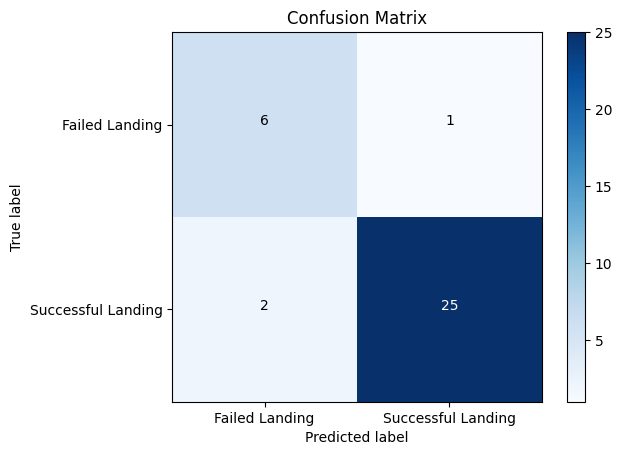

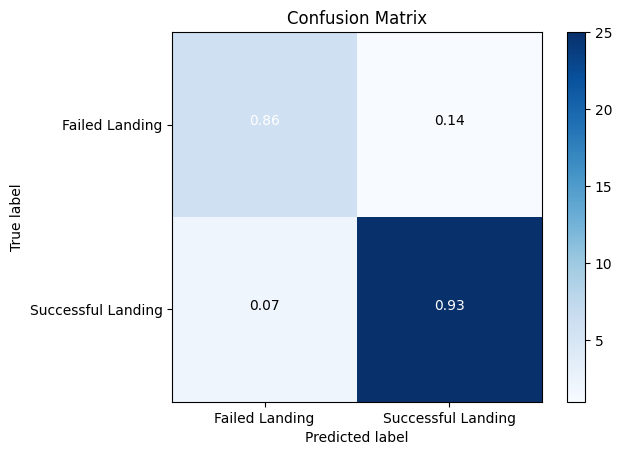

In [26]:
normalize=True
not_normalize=False

plot_confusion_matrix(cm, not_normalize, Y_test, y_predict)
plot_confusion_matrix(cm, normalize, Y_test, y_predict)

# Random Forest

In [27]:
rf = RandomForestClassifier()

param_rf  = {'n_estimators': [50],
    'criterion': ['gini', 'entropy'],
     'max_depth': [2,4,6,8,10],
     'min_samples_leaf': [1, 2, 3, 4],
     'min_samples_split': [2, 4, 6, 8, 10],
     'random_state': [30]}

In [28]:
rf_cv = GridSearchCV(rf,param_rf,cv=10, scoring='accuracy')
rf_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [50], 'random_state': [30]},
             scoring='accuracy')

In [29]:
rf_cv_f1 = GridSearchCV(rf,param_rf,cv=10, scoring='f1')
rf_cv_f1.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [50], 'random_state': [30]},
             scoring='f1')

In [30]:
rf_cv_f1.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 30}

In [31]:
rf_cv_f1.best_score_

0.9512610577827969

In [32]:
rf_cv_f1.score(X_test, Y_test)

0.9629629629629629

In [33]:
rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 30}

In [34]:
rf_cv.best_score_

0.9181318681318681

In [35]:
rf_cv.score(X_test, Y_test)

0.9411764705882353

In [36]:
y_predict_rf = rf_cv.predict(X_test)
cm_rf = confusion_matrix(Y_test, y_predict_rf)

In [37]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [38]:
rf_precision = precision_score(Y_test, y_predict_rf)
rf_recall = recall_score(Y_test, y_predict_rf)

In [39]:
rf_precision

0.9629629629629629

In [40]:
rf_recall

0.9629629629629629

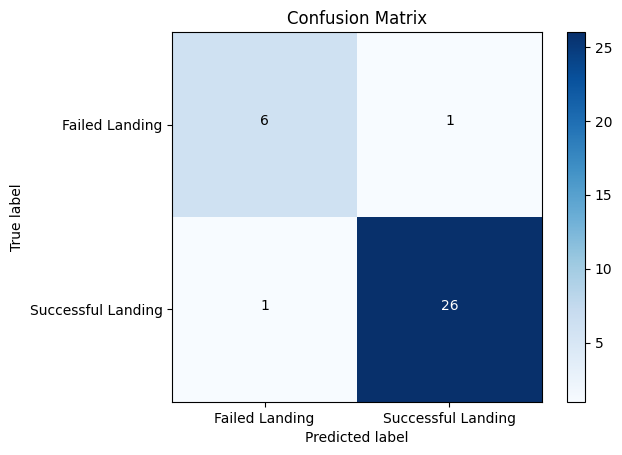

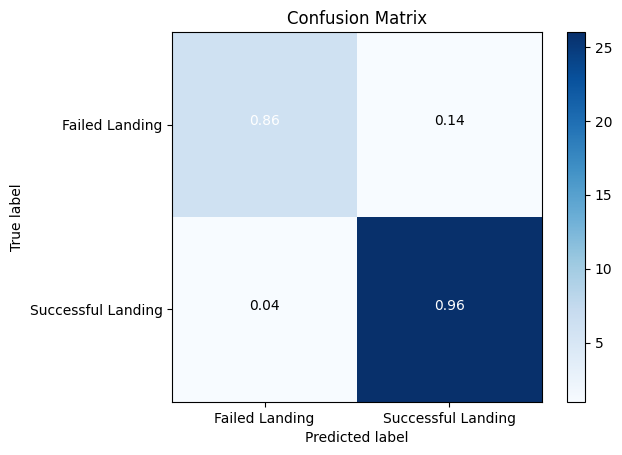

In [41]:
normalize=True
not_normalize=False

plot_confusion_matrix(cm_rf, not_normalize, Y_test, y_predict_rf)
plot_confusion_matrix(cm_rf, normalize, Y_test, y_predict_rf)

# Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
gb = GradientBoostingClassifier()

In [44]:
gb_param = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [50,100],
    'max_depth': [3, 4, 5],
    'random_state': [30]
}

In [45]:
gb_cv = GridSearchCV(gb, gb_param,cv=10, scoring='accuracy')
gb_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100],
                         'random_state': [30]},
             scoring='accuracy')

In [46]:
gb_cv_f1 = GridSearchCV(gb, gb_param,cv=10, scoring='f1')
gb_cv_f1.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100],
                         'random_state': [30]},
             scoring='f1')

In [47]:
gb_cv_f1.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'random_state': 30}

In [48]:
gb_cv_f1.best_score_

0.9328511198945982

In [49]:
gb_cv_f1.score(X_test, Y_test)

0.9454545454545454

In [50]:
gb_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'random_state': 30}

In [51]:
gb_cv.best_score_

0.8818681318681317

In [52]:
gb_cv.score(X_test, Y_test)

0.9117647058823529

In [53]:
y_predict_gb = gb_cv.predict(X_test)
cm_gb = confusion_matrix(Y_test, y_predict_gb)

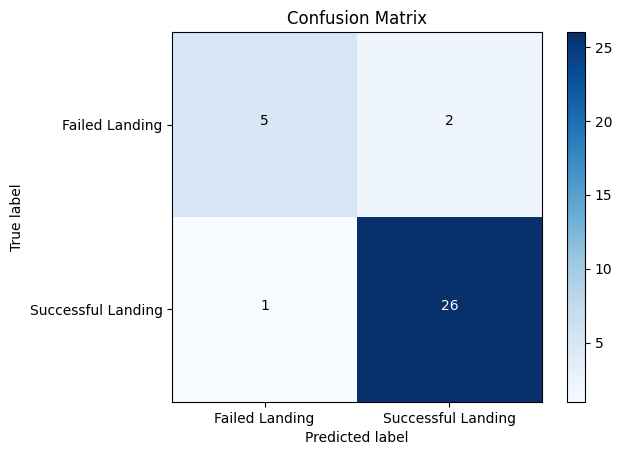

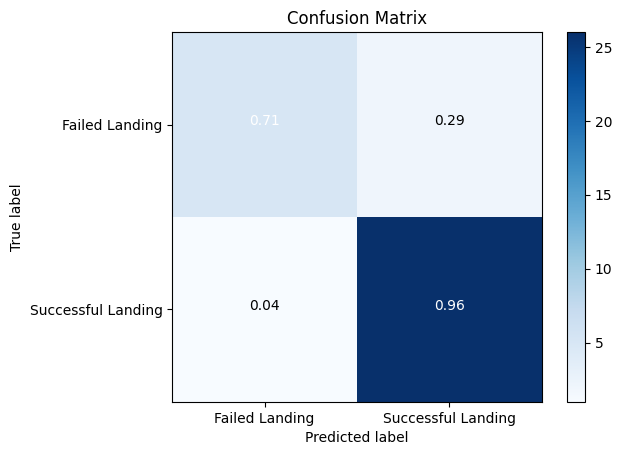

In [54]:
normalize=True
not_normalize=False

plot_confusion_matrix(cm_gb, not_normalize, Y_test, y_predict_gb)
plot_confusion_matrix(cm_gb, normalize, Y_test, y_predict_gb)

# Logistic Regression

In [55]:
lgr = LogisticRegression()

param_lgr ={'penalty':['l2'], # For penalties, use the default L2 if regularization is required.
            "C":[0.01,0.1,1], # The inverse of the strength of regularisation (The smaller, the stronger the regularisation).
            'solver':['lbfgs','newton-cg','sag'],# Solvers by default, when setting regularization, need to use a solver that supports regularization.
            'random_state': [30]}

In [56]:
lgr_cv = GridSearchCV(lgr, param_lgr, cv=10, scoring='accuracy')
lgr_cv.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'random_state': [30],
                         'solver': ['lbfgs', 'newton-cg', 'sag']},
             scoring='accuracy')

In [57]:
lgr_cv_f1 = GridSearchCV(lgr, param_lgr, cv=10, scoring='f1')
lgr_cv_f1.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'random_state': [30],
                         'solver': ['lbfgs', 'newton-cg', 'sag']},
             scoring='f1')

In [58]:
lgr_cv_f1.best_score_

0.9460850743459439

In [59]:
lgr_cv_f1.score(X_test, Y_test)

0.9259259259259259

In [60]:
lgr_cv.best_params_

{'C': 1, 'penalty': 'l2', 'random_state': 30, 'solver': 'sag'}

In [61]:
lgr_cv.best_score_

0.9104395604395604

In [62]:
lgr_cv.score(X_test, Y_test)

0.8823529411764706

In [63]:
y_predict_lgr = lgr_cv.predict(X_test)
cm_lgr = confusion_matrix(Y_test, y_predict_lgr)

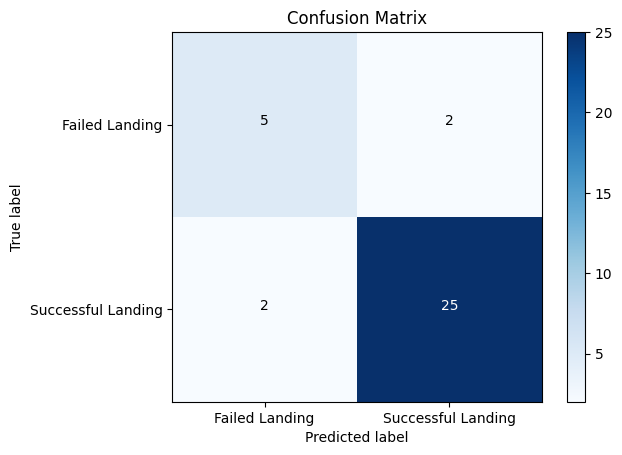

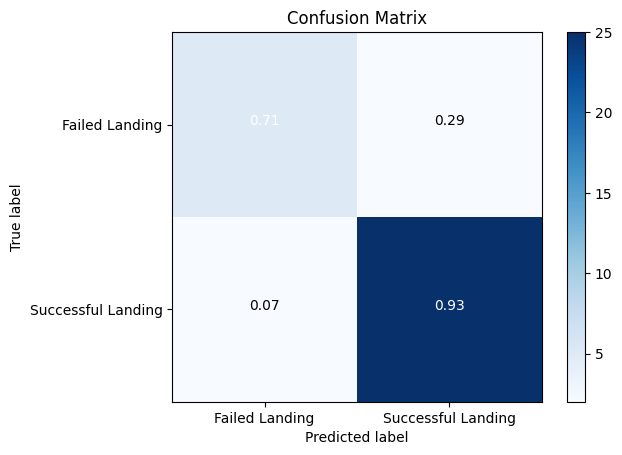

In [64]:
normalize=True
not_normalize=False

plot_confusion_matrix(cm_lgr, not_normalize, Y_test, y_predict_lgr)
plot_confusion_matrix(cm_lgr, normalize, Y_test, y_predict_lgr)

# Linear Nerual network

In [65]:
from sklearn.linear_model import Perceptron

In [66]:
# linear nerual network model（Perceptron)
lnn = Perceptron()

In [67]:
lnn.fit(X_train, Y_train)

Perceptron()

In [68]:
cv_lnn = cross_val_score(lnn, X_train, Y_train, scoring='accuracy', cv=10)
cv_lnn

array([ 0.71,  0.86,  0.86,  0.86,  0.85,  0.92,  0.85,  0.77,  0.92,
        0.92])

In [69]:
cv_lnn_f1 = cross_val_score(lnn, X_train, Y_train, scoring='f1', cv=10)
cv_lnn_f1

array([ 0.80,  0.91,  0.91,  0.91,  0.91,  0.95,  0.92,  0.84,  0.96,
        0.95])

In [70]:
max(cv_lnn_f1)

0.9565217391304348

In [71]:
max(cv_lnn)

0.9230769230769231

In [72]:
y_predict_lnn = lnn.predict(X_test)
cm_lnn = confusion_matrix(Y_test, y_predict_lnn)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
from sklearn.metrics import f1_score

In [75]:
lnn_cv_acc = accuracy_score(Y_test, y_predict_lnn)
lnn_cv_acc

0.8823529411764706

In [76]:
lnn_cv_f1 = f1_score(Y_test, y_predict_lnn)
lnn_cv_f1

0.9259259259259259

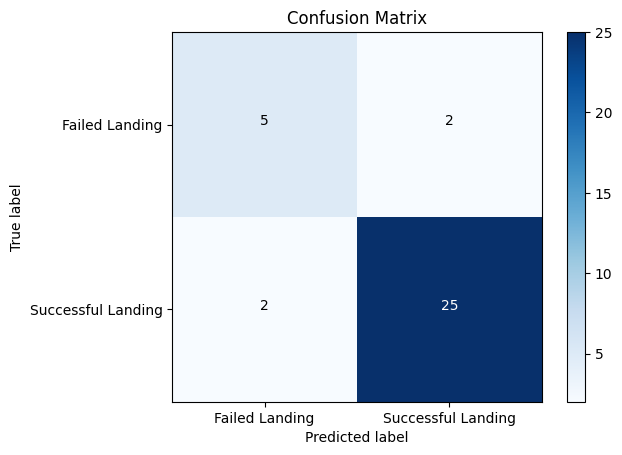

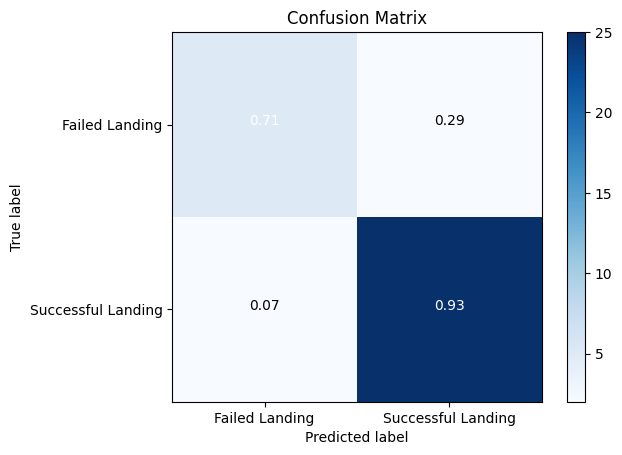

In [77]:
normalize=True
not_normalize=False

plot_confusion_matrix(cm_lnn, not_normalize, Y_test, y_predict_lnn)
plot_confusion_matrix(cm_lnn, normalize, Y_test, y_predict_lnn)

# K Nearest Neighbors

In [78]:
knn = KNeighborsClassifier()

param_knn ={'n_neighbors': [1, 3, 5, 7, 9, 11],
            'p': [1,2], # p=1 is the Manhattan distance, p=2 is the Euclidean distance
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']} # The sample is small and the features are few, the default 'auto' is sufficient.

In [79]:
knn_cv = GridSearchCV(knn, param_knn, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11], 'p': [1, 2]})

In [80]:
knn_cv_f1 = GridSearchCV(knn, param_knn, scoring = 'f1', cv=10)
knn_cv_f1.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11], 'p': [1, 2]},
             scoring='f1')

In [81]:
knn_cv_f1.best_score_

0.9444888010540184

In [82]:
knn_cv_f1.score(X_test, Y_test)

0.9285714285714286

In [83]:
knn_cv.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}

In [84]:
knn_cv.best_score_

0.9032967032967033

In [85]:
knn_cv.score(X_test, Y_test)

0.8823529411764706

In [86]:
y_predict_knn = knn_cv.predict(X_test)
cm_knn = confusion_matrix(Y_test, y_predict_knn)

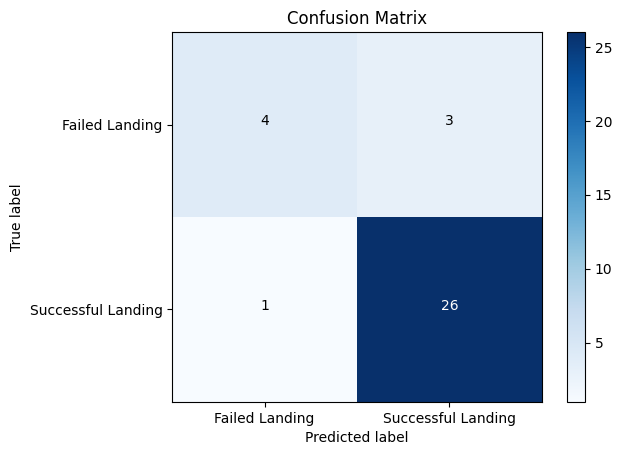

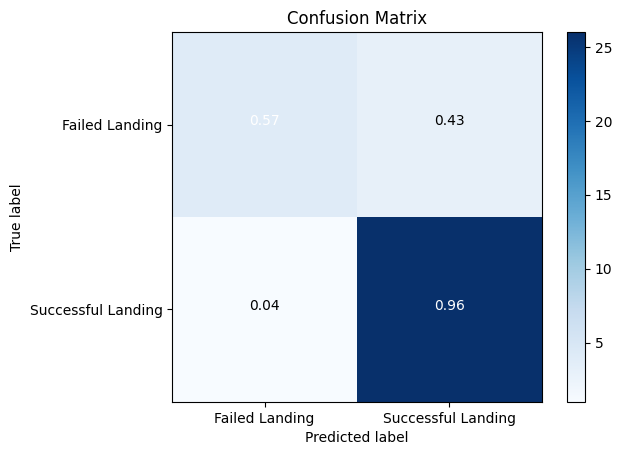

In [87]:
normalize=True
not_normalize=False

plot_confusion_matrix(cm_knn, not_normalize, Y_test, y_predict_knn)
plot_confusion_matrix(cm_knn, normalize, Y_test, y_predict_knn)

# Support Vector Machine

In [88]:
svm = SVC()

param_svm = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), # Kernel function, default is rbf
              'C': np.logspace(-2, 2, 10), # Penalty parameter for the error term
              'gamma':['auto'],
              'random_state': [30]}

In [89]:
svm_cv = GridSearchCV(svm, param_svm, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([ 0.01,  0.03,  0.08,  0.22,  0.60,  1.67,  4.64,  12.92,  35.94,
        100.00]),
                         'gamma': ['auto'],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
                         'random_state': [30]})

In [90]:
svm_cv_f1 = GridSearchCV(svm, param_svm, scoring='f1', cv=10)
svm_cv_f1.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([ 0.01,  0.03,  0.08,  0.22,  0.60,  1.67,  4.64,  12.92,  35.94,
        100.00]),
                         'gamma': ['auto'],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
                         'random_state': [30]},
             scoring='f1')

In [91]:
svm_cv_f1.best_score_

0.9527891963109354

In [92]:
svm_cv_f1.score(X_test, Y_test)

0.9259259259259259

In [93]:
svm_cv.best_params_

{'C': 1.6681005372000592,
 'gamma': 'auto',
 'kernel': 'sigmoid',
 'random_state': 30}

In [94]:
svm_cv.best_score_

0.9181318681318681

In [95]:
svm_cv.score(X_test, Y_test)

0.8823529411764706

In [96]:
y_predict_svm = svm_cv.predict(X_test)
cm_svm = confusion_matrix(Y_test, y_predict_svm)

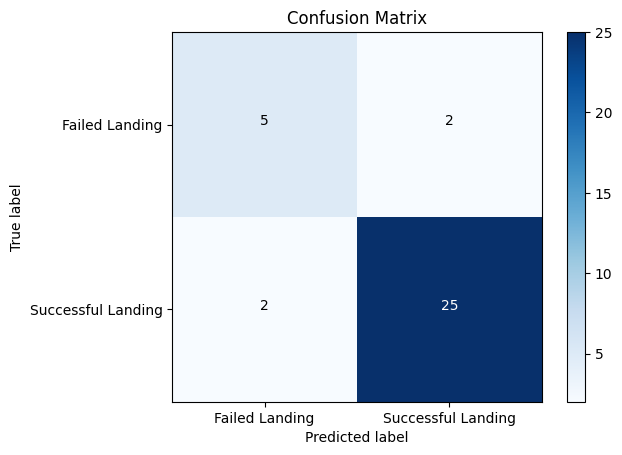

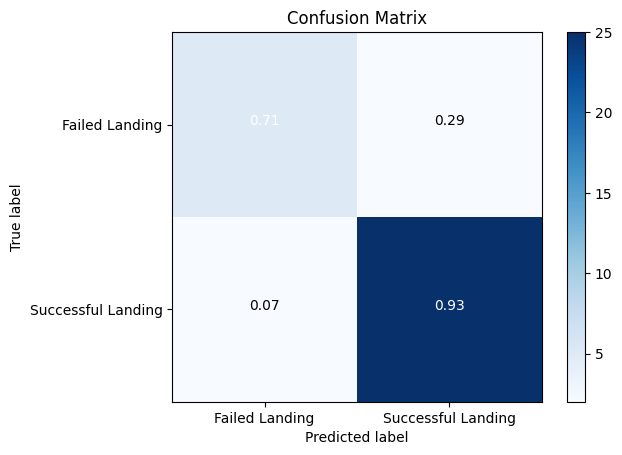

In [97]:
normalize=True
not_normalize=False

plot_confusion_matrix(cm_svm, not_normalize, Y_test, y_predict_svm)
plot_confusion_matrix(cm_svm, normalize, Y_test, y_predict_svm)

# Naive Bayes

In [98]:
nb = naive_bayes.GaussianNB()

nb.fit(X_train, Y_train)

GaussianNB()

In [99]:
nb_cv = nb.score(X_test, Y_test)
nb_cv 

0.7352941176470589

In [100]:
cv_nb = cross_val_score(nb, X_train, Y_train, scoring='accuracy', cv=10)
cv_nb

array([ 0.86,  0.64,  0.79,  0.71,  0.77,  0.77,  0.85,  0.69,  0.77,
        0.92])

In [101]:
cv_nb_f1 = cross_val_score(nb, X_train, Y_train, scoring='f1', cv=10)
cv_nb_f1

array([ 0.90,  0.76,  0.87,  0.80,  0.86,  0.84,  0.92,  0.78,  0.86,
        0.95])

In [102]:
max(cv_nb_f1)

0.9523809523809523

In [103]:
max(cv_nb)

0.9230769230769231

In [104]:
y_predict_nb = nb.predict(X_test)
cm_nb = confusion_matrix(Y_test, y_predict_nb)

In [105]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [106]:
nb_cv_acc = accuracy_score(Y_test, y_predict_nb)
nb_cv_acc

0.7352941176470589

In [107]:
nb_cv_f1 = f1_score(Y_test, y_predict_nb)
nb_cv_f1

0.8163265306122449

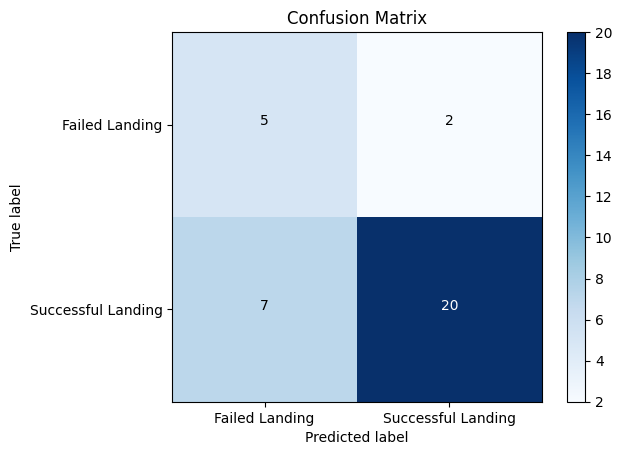

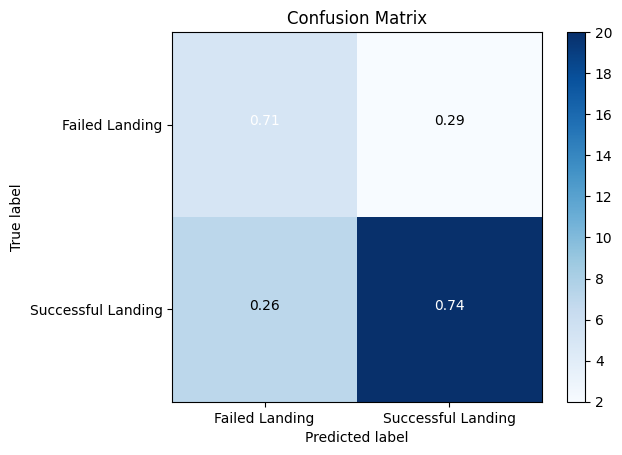

In [108]:
normalize=True
not_normalize=False

plot_confusion_matrix(cm_nb, not_normalize, Y_test, y_predict_nb)
plot_confusion_matrix(cm_nb, normalize, Y_test, y_predict_nb)

# Multi-layer Perceptron

In [109]:
from sklearn.neural_network import MLPClassifier

In [110]:
mlp = MLPClassifier()

In [155]:
mlp_param = {
    'hidden_layer_sizes': [(1200,), (1500,), (2000)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd'],
    'random_state': [30]
}

In [156]:
mlp_cv = GridSearchCV(mlp, mlp_param, scoring='accuracy', cv=10)

In [157]:
mlp_cv_f1 = GridSearchCV(mlp, mlp_param, scoring='f1', cv=10)

In [158]:
mlp_cv.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(1200,), (1500,), 2000],
                         'random_state': [30], 'solver': ['sgd']},
             scoring='accuracy')

In [159]:
mlp_cv_f1.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(1200,), (1500,), 2000],
                         'random_state': [30], 'solver': ['sgd']},
             scoring='f1')

In [166]:
mlp_cv.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (1200,),
 'random_state': 30,
 'solver': 'sgd'}

In [160]:
mlp_cv_f1.best_score_

0.9408656126482213

In [161]:
mlp_cv_f1.score(X_test, Y_test)

0.9285714285714286

In [162]:
mlp_cv.best_score_

0.896153846153846

In [163]:
mlp_cv.score(X_test, Y_test)

0.9117647058823529

In [164]:
y_predict_mlp = mlp_cv.predict(X_test)
cm_mlp = confusion_matrix(Y_test, y_predict_mlp)

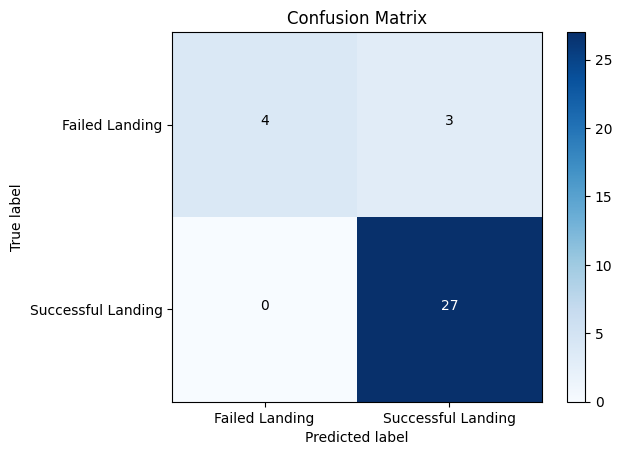

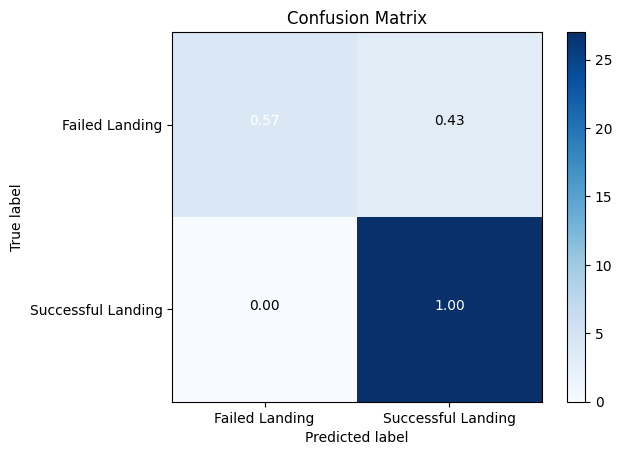

In [165]:
normalize=True
not_normalize=False

plot_confusion_matrix(cm_mlp, not_normalize, Y_test, y_predict_mlp)
plot_confusion_matrix(cm_mlp, normalize, Y_test, y_predict_mlp)

Text(0.5, 1.0, 'Accuracy for all models(Training set) ')

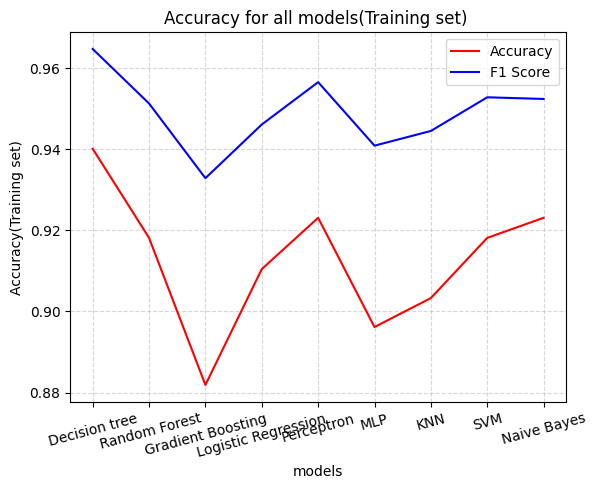

In [167]:
t_acc_of_all_models  = [tree_cv.best_score_, rf_cv.best_score_, gb_cv.best_score_, lgr_cv.best_score_,
             max(cv_lnn), mlp_cv.best_score_, knn_cv.best_score_, svm_cv.best_score_, max(cv_nb)]
t_f1_of_all_models  = [tree_cv_f1.best_score_, rf_cv_f1.best_score_, gb_cv_f1.best_score_, lgr_cv_f1.best_score_,
             max(cv_lnn_f1), mlp_cv_f1.best_score_, knn_cv_f1.best_score_, svm_cv_f1.best_score_, max(cv_nb_f1)]
t_all_models  = ['Decision tree', ' Random Forest','Gradient Boosting', 'Logistic Regression','Perceptron','MLP', 'KNN', 'SVM', 'Naive Bayes']

plt.plot(t_all_models, t_acc_of_all_models, '-r', label='Accuracy')
plt.plot(t_all_models, t_f1_of_all_models, '-b', label='F1 Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xlabel("models")
plt.xticks(rotation=15)
plt.ylabel("Accuracy(Training set)")
plt.title("Accuracy for all models(Training set) ")

Text(0.5, 1.0, 'Accuracy for all models(Test set) ')

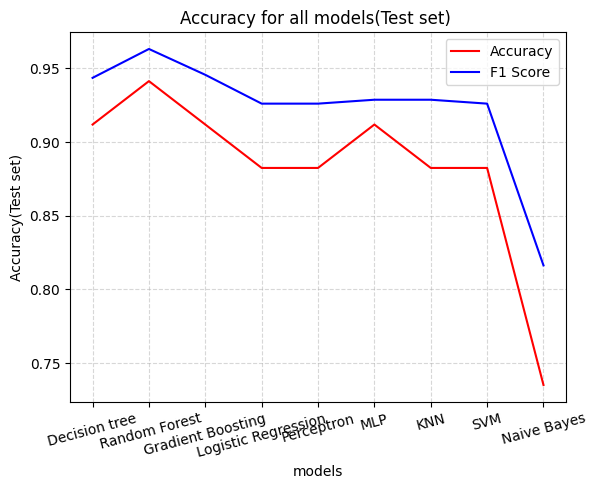

In [168]:
acc_of_all_models  = [tree_cv.score(X_test, Y_test), rf_cv.score(X_test, Y_test), gb_cv.score(X_test, Y_test),
            lgr_cv.score(X_test, Y_test), lnn_cv_acc, mlp_cv.score(X_test, Y_test), knn_cv.score(X_test, Y_test), svm_cv.score(X_test, Y_test), nb_cv_acc ]
f1_of_all_models  = [tree_cv_f1.score(X_test, Y_test), rf_cv_f1.score(X_test, Y_test), gb_cv_f1.score(X_test, Y_test),
            lgr_cv_f1.score(X_test, Y_test), lnn_cv_f1, mlp_cv_f1.score(X_test, Y_test), knn_cv_f1.score(X_test, Y_test), svm_cv_f1.score(X_test, Y_test), nb_cv_f1]
all_models  = ['Decision tree', ' Random Forest','Gradient Boosting', 'Logistic Regression', 'Perceptron', 'MLP','KNN', 'SVM', 'Naive Bayes']


plt.plot(all_models, acc_of_all_models, '-r', label='Accuracy')
plt.plot(all_models, f1_of_all_models, '-b', label='F1 Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xlabel("models")
plt.xticks(rotation=15)
plt.ylabel("Accuracy(Test set)")
plt.title("Accuracy for all models(Test set) ")